In [2]:
import os

import jax
import jax.numpy as jnp
import jax.random as jrand

import matplotlib.pyplot as plt
import numpy as np

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


/tmp/ipykernel_996745/4079869577.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


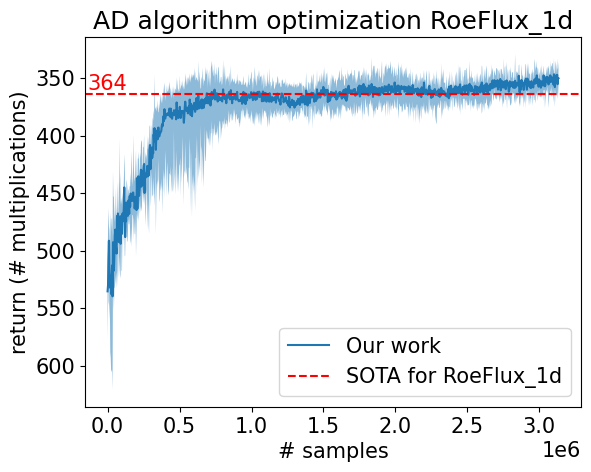

In [7]:

font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc("font", **font)

path = "PPO_data/" # "A0_data/" # 
l = 1000 # 1500

runs = []
for file in os.listdir(path=os.path.join(os.getcwd(), path)):
				if file.endswith(".csv"):
								data = np.genfromtxt(os.path.join(os.getcwd(), path, file), delimiter=",", skip_header=1)
								num_samples = data[:l, 0]*32*98 
								num_muls = data[:l, 1]
								print(num_muls.shape)
								runs.append(num_muls)

data = jnp.stack(runs, axis=0)

data_mean = jnp.mean(data, axis=0)
data_max = jnp.max(data, axis=0)
data_min	= jnp.min(data, axis=0)

fig, ax = plt.subplots()
ax.plot(num_samples, data_mean, label="Our work")
ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
ax.axhline(y=-364., color="r", linestyle="--", label="SOTA for RoeFlux_1d")
ax.annotate("364", (num_samples[0], -364), textcoords="offset points", xytext=(0, 3), ha="center", color="red")
ax.set_xlabel("# samples")
ax.set_ylabel("return (# multiplications)")
ax.set_title("AD algorithm optimization RoeFlux_1d")

ticks = ax.get_yticks()
labels = ax.get_yticklabels()
labels = [str(int(-t)) for t in ticks]
ax.set_yticklabels(labels)

ax.legend(loc="lower right")

In [3]:
from graphax.perf import plot_performance, measure
from graphax.examples import RoeFlux_1d

In [4]:
# 320 mults
order = [8, 82, 27, 66, 7, 78, 76, 13, 48, 42, 68, 86, 95, 4, 59, 28, 77, 54, 1, 
         94, 5, 58, 72, 93, 75, 31, 53, 33, 57, 90, 44, 25, 89, 88, 84, 96, 74, 
         92, 83, 91, 45, 51, 81, 80, 11, 10, 85, 43, 22, 73, 19, 71, 6, 18, 17, 
         79, 47, 50, 52, 21, 37, 38, 55, 49, 69, 35, 65, 29, 64, 16, 9, 60, 15, 
         61, 23, 87, 70, 67, 24, 46, 63, 39, 2, 62, 3, 41, 40, 32, 26, 34, 56, 
         30, 14, 98, 36, 12, 20, 100] 

mM_order = [4, 5, 8, 9, 16, 17, 25, 27, 31, 33, 38, 43, 44, 45, 69, 84, 1, 2,
            10, 13, 18, 21, 26, 28, 32, 34, 37, 39, 42, 47, 50, 53, 57, 59, 
            62, 64, 66, 67, 68, 71, 73, 75, 76, 77, 80, 81, 83, 85, 86, 87, 
            91, 92, 95, 11, 14, 19, 22, 51, 54, 58, 60, 63, 65, 72, 79, 88, 
            90, 93, 96, 3, 6, 7, 15, 29, 40, 56, 61, 74, 78, 82, 48, 89, 94, 
            23, 35, 46, 24, 70, 41, 98, 100, 12, 20, 30, 49, 52, 55, 36]

In [10]:
shape = (512,)
key = jrand.PRNGKey(1234)
xs = [.01, .02, .02, .01, .03, .03]
xs = [jrand.uniform(key, shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
_, median, error = measure(RoeFlux_1d, xs, samplesize=1000)
median, error

100%|██████████| 1000/1000 [00:00<00:00, 5100.77it/s]


(Array(0.00807201, dtype=float32),
 Array([-0.00021025,  0.0006949 ], dtype=float32))

 95%|█████████▌| 952/1000 [00:04<00:00, 272.29it/s]

KeyboardInterrupt: 

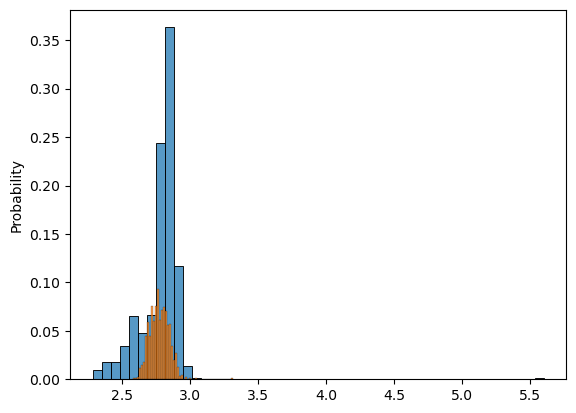

In [8]:
shape = (512,)
key = jrand.PRNGKey(1234)
xs = [.01, .02, .02, .01, .03, .03]
xs = [jrand.uniform(key, shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
plot_performance(RoeFlux_1d, xs, order, mM_order, "./RoeFlux.png", samplesize=1000)

### The best
fwd mean: 3.032777786254883, rev mean: 3.081002712249756, mM mean: 2.866410732269287, cc mean: 2.188291549682617
fwd err: [-0.27058816  0.17363954], rev err: [-0.22816157  0.17084837], mM err: [-0.65521526  0.21982956], cc err: [-0.3505528   0.30476046]

fwd mean: 2.9437732696533203, rev mean: 2.9337830543518066, mM mean: 2.9530389308929443, cc mean: 2.760946750640869
fwd err: [-0.0979023   0.09854531], rev err: [-0.09846926  0.09681487], mM err: [-0.09948778  0.11885738], cc err: [-0.19083905  0.13550425]

fwd mean: 2.6247079372406006, rev mean: 3.05964994430542, mM mean: 2.979163885116577, cc mean: 2.4885149002075195
fwd err: [-0.37772202  1.0231125 ], rev err: [-0.19163871  0.5160451 ], mM err: [-0.8269043   0.85118294], cc err: [-1.2484213   0.89338493]

fwd mean: 2.8178303241729736, rev mean: 2.811877965927124, mM mean: 2.4827146530151367, cc mean: 2.0367538928985596 
fwd err: [-0.17321444  0.15326643], rev err: [-0.18122506  0.18415976], mM err: [-0.3973658   0.29247832], cc err: [-0.18973374  0.655694  ]

100%|██████████| 110/110 [00:24<00:00,  4.47it/s]
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


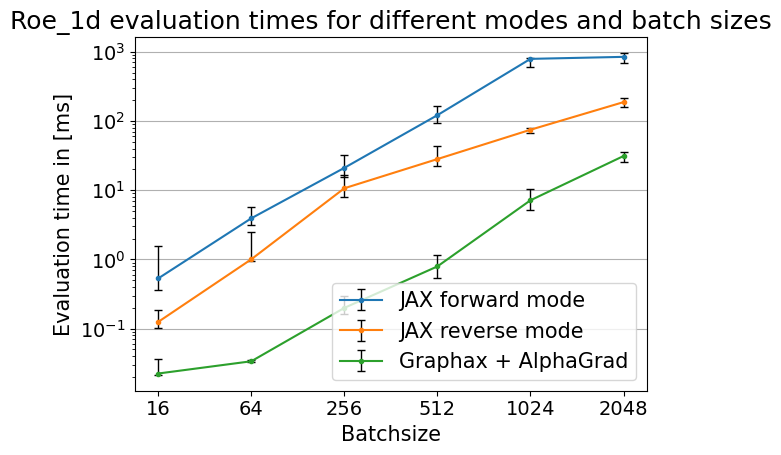

In [5]:
from graphax.perf import plot_performance_over_size_jax

shapes = (16, 64, 256, 512, 1024, 2048)
key = jrand.PRNGKey(1234)
xs = [.01, .02, .02, .01, .03, .03]
xs = [[jrand.uniform(key, (shape,))*x for x in xs] for shape in shapes]
xs = jax.device_put(xs, jax.devices("cpu")[0])

plot_performance_over_size_jax(RoeFlux_1d, xs, order, "Roe_1d", ticks=shapes, samplesize=110)